# Recommender System

Dataset by: Retail Rocket

## About Retail rocket
It is a 2012 start-up which help webshops to implement personalization technologies and take their marketing to the next level by real-time adjusting the website to each visitor’s interests and ultimately increasing their conversion rate, average order value and customer retention.

More about Retail Rocket: [Retail Rocket](https://retailrocket.net/technologies/)

In [1]:
# We will start with importing all the necessary libraries for working and processing the datasets.

import numpy as np #fo the funtions of linear algebra
import pandas as pd #for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#Matplotlib: Matplotlib is mainly deployed for basic plotting. Visualization using Matplotlib generally consists 
#of bars, pies, lines, scatter plots and so on. 

#Seaborn: Seaborn, on the other hand, provides a variety of visualization patterns. It uses fewer syntax and 
#has easily interesting default themes.

# Input data files are available in the "../Final/" directory.Therefore using the following code we can see our 
# input datafiles. 
import os
print(os.listdir("../Final"))

['events.csv', 'item_properties_part1.csv', 'category_tree.csv', 'Recommender System-Copy1.ipynb', 'Recommender System.ipynb', '.ipynb_checkpoints', 'item_properties_part2.csv']


#### Now we will read the datasets and for a useful concatenated table for our use.

In [2]:
items1 = pd.read_csv('../Final/item_properties_part1.csv')
items2 = pd.read_csv('../Final/item_properties_part2.csv')
items = pd.concat([items1,items2])
items.head(10)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
5,1436065200000,285026,available,0
6,1434250800000,89534,213,1121373
7,1431831600000,264312,6,319724
8,1433646000000,229370,202,1330310
9,1434250800000,98113,451,1141052 n48.000


In [3]:
#for the dimension of the items matrix
items.shape

(20275902, 4)

## About  Unix Epoch format

In the above table the timestamp portion is in Unix Epoch format e.g. 1433221332117 will be converted to Tuesday, 2 June 2015 5:02:12.117 AM GMT

### More about [Unix Epoch](https://en.wikipedia.org/wiki/Unix_time)

In [4]:
import datetime
times = []
for i in items['timestamp']:
    times.append(datetime.datetime.fromtimestamp(i//1000.0))

In [5]:
items['timestamp'] = times

In [6]:
items.head(10)

,timestamp,itemid,property,value
0,2015-06-28 08:30:00,460429,categoryid,1338
1,2015-09-06 08:30:00,206783,888,1116713 960601 n277.200
2,2015-08-09 08:30:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 08:30:00,59481,790,n15360.000
4,2015-05-17 08:30:00,156781,917,828513
5,2015-07-05 08:30:00,285026,available,0
6,2015-06-14 08:30:00,89534,213,1121373
7,2015-05-17 08:30:00,264312,6,319724
8,2015-06-07 08:30:00,229370,202,1330310
9,2015-06-14 08:30:00,98113,451,1141052 n48.000


In [7]:
#now we load the event dataset
events = pd.read_csv('../Final/events.csv')

In [8]:
events.head(10)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
5,1433224086234,972639,view,22556,NaN
6,1433221923240,810725,view,443030,NaN
7,1433223291897,794181,view,439202,NaN
8,1433220899221,824915,view,428805,NaN
9,1433221204592,339335,view,82389,NaN


In [9]:
events.shape

(2756101, 5)

### Analysing the event dataset

We will look into the types of event and then have a graphical representation of the types of events

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64


<AxesSubplot:xlabel='event', ylabel='count'>

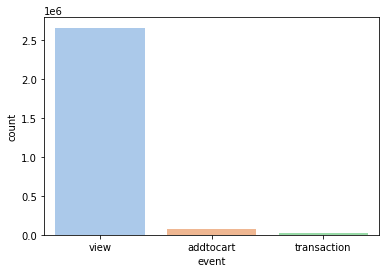

In [10]:
print(events['event'].value_counts())
sns.countplot(x = 'event' , data = events, palette = "pastel")

#### Now as we already see this above as a bar graph lets have a look on the same as pie-chart

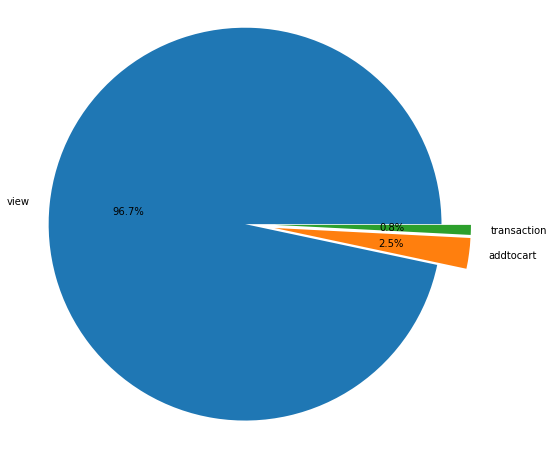

In [11]:
data = events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.15, 0.15)  # explode 1st slice
plt.subplots(figsize=(8,8))

# Plot the same in a pie chart
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
 
plt.axis('equal')
plt.show()

#### Moving to the next dataset, now we will analyze the category tree dataset 

In [12]:
category_tree = pd.read_csv('../Final/category_tree.csv')

In [13]:
category_tree.head(10)

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


**In the category_tree table :**
Category IDs explain the relationship of different products with each other e.g. Category ID 1016 is a child of Parent ID 213.

Below shows the number of items under category id 1016

In [14]:
items.loc[(items.property=='categoryid')&(items.value == '1016')].sort_values('timestamp').head()

,timestamp,itemid,property,value
7236969,2015-05-10 08:30:00,6777,categoryid,1016
8597591,2015-05-10 08:30:00,161686,categoryid,1016
9496408,2015-05-10 08:30:00,276491,categoryid,1016
6880131,2015-05-10 08:30:00,443058,categoryid,1016
7202531,2015-05-10 08:30:00,462004,categoryid,1016


### Lets see unique and total visitors from event datasets

In [15]:
# All unique visitors
all_customers = events['visitorid'].unique()
print("Unique visitors: " , all_customers.size)

# All visitors
print("All Visitors :" , events['visitorid'].size)

Unique visitors:  1407580
All Visitors : 2756101




### Now we will look for the number of customers who acutally bought something 

In [16]:
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()
print("Number of customers who acutally bought something :" , customer_purchased.size)

Number of customers who acutally bought something : 11719





### This shows that out of 1407580 unique customers, 11719 were the ones who actually did at least a single purchase

Now let us see how many items has categoyid or available as property

In [17]:
items_new = items.loc[items.property.isin(['categoryid', 'available']), :]
print("Items with categoryid and available as property:", items_new.size)
items_new.head(20)

Items with categoryid and available as property: 9167412


,timestamp,itemid,property,value
0,2015-06-28 08:30:00,460429,categoryid,1338
5,2015-07-05 08:30:00,285026,available,0
15,2015-07-19 08:30:00,186518,available,0
79,2015-06-07 08:30:00,423682,available,0
82,2015-06-14 08:30:00,316253,available,1
96,2015-07-19 08:30:00,430459,available,0
101,2015-05-31 08:30:00,411262,available,0
116,2015-09-06 08:30:00,50372,available,0
119,2015-09-06 08:30:00,289043,available,0
133,2015-06-28 08:30:00,365407,available,0


In [18]:
# Now we will group the itemid into a lists according to their event types

grouped = events.groupby('event')['itemid'].apply(list)
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object




**Now we will see the most _VIEWED_ items**

<AxesSubplot:>

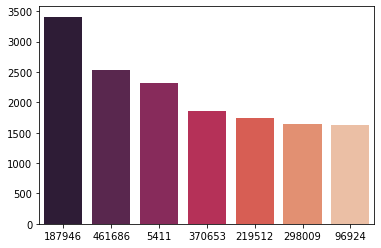

In [19]:
import operator
views = grouped['view']

count_view = {} #creating dictionary for key value pair

views = np.array(views[:]) #Since views is a list, we will convert it into a numpy array for further manipulation

unique, counts = np.unique(views, return_counts = True) #counting uniques values of views of this numpy views array

count_view = dict(zip(unique,counts)) # converting unique and counts as a dictionay with key as unique and value as counts

#sorting the dictionary
sort_count_view = sorted(count_view.items(), key = operator.itemgetter(1), reverse = True)

x = [i[0] for i in sort_count_view[:7]] # keeping number of unique views on X-axis

y = [i[1] for i in sort_count_view[:7]] # keeping count number of views on Y-axis

sns.barplot(x, y, order=x, palette="rocket") #plotting a bargraph




**Now we will see the most _ADDTOCART_ items**

<AxesSubplot:>

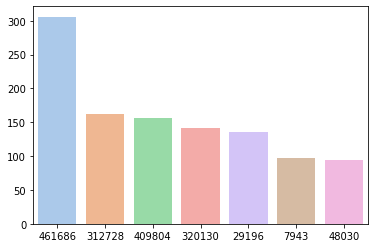

In [20]:
addtocart = grouped['addtocart']
 
count_addtocart ={}# creating dictionary for key value pair

addtocart = np.array(addtocart[:]) #since addtocart is a list, we will convert it into numpy array for further manipulations

unique, counts = np.unique(addtocart, return_counts=True) #counting uniques values of addtocart items of this numpy addtocart array

count_addtocart = dict(zip(unique, counts)) # converting unique and counts as a dictionay with key as unique and value as counts

sort_count_addtocart = sorted(count_addtocart.items(), key = operator.itemgetter(1), reverse = True) #sorting the dictionary

x = [i[0] for i in sort_count_addtocart[:7]] # keeping number of unique views on X-axis

y = [i[1] for i in sort_count_addtocart[:7]] # keeping count number of views on Y-axis

sns.barplot(x, y, order=x, palette="pastel") #plotting a bargraph




**Now we will check the most _TRANSACTIONED_ items**

<AxesSubplot:>

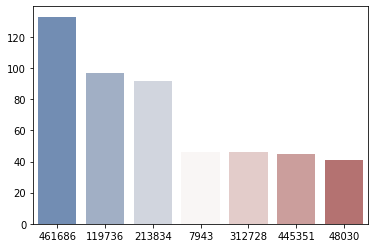

In [21]:
transaction = grouped['transaction']
 
count_transaction ={} # creating dictionary for key value pair

transaction = np.array(transaction[:]) #since addtocart is a list, we will convert it into numpy array for further manipulations

unique, counts = np.unique(transaction, return_counts=True) #counting uniques values of addtocart items of this numpy addtocart array

count_transaction = dict(zip(unique, counts)) # converting unique and counts as a dictionay with key as unique and value as counts

#sorting the dictionary
sort_count_transaction = sorted(count_transaction.items(), key = operator.itemgetter(1), reverse = True)

x = [i[0] for i in sort_count_transaction[:7]] # keeping number of unique views on X-axis

y = [i[1] for i in sort_count_transaction[:7]] # keeping count number of views on Y-axis

sns.barplot(x, y, order=x, palette="vlag") #plotting a bargraph

In [22]:
# Now after having the most transactioned list we will be analyzing 461686 itemid
events.loc[(events.itemid==461686)]

,timestamp,visitorid,event,itemid,transactionid
5632,1433179439299,1026179,view,461686,NaN
8782,1433176153804,668227,view,461686,NaN
9651,1433140509491,693466,view,461686,NaN
10749,1433196464528,248754,view,461686,NaN
13618,1433142326018,1207651,view,461686,NaN
...,...,...,...,...,...
2753402,1438351837583,340886,view,461686,NaN
2754441,1438382216273,537015,view,461686,NaN
2755192,1438380064263,537015,view,461686,NaN
2755370,1438379267145,388278,addtocart,461686,NaN


### Moving to the next step:

Lets offer visitor a list of items of what previous visitors bought **TOGETHER with the item they are currently viewing.** 
This way we can guide them in their buying journey by recommending the items

In [23]:
# We will first create a list of visitors who made a purchase from the store
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()

# Now lets create a list of purchased items
purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))


In [24]:
purchased_items[:7]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044],
 [54058,
  284871,
  251130,
  268335,
  183049,
  261940,
  369093,
  370745,
  192990,
  277119,
  241716,
  283766,
  16417,
  217068,
  36372,
  68923,
  428015,
  69533,
  13520,
  385638,
  442871,
  136526,
  247862,
  93828,
  230911,
  382595,
  34853,
  216260,
  154812,
  445241,
  57702,
  347850,
  151855,
  226327,
  288525,
  51354,
  345994,
  170438,
  254301,
  266439,
  193718,
  388558,
  26745,
  184086,
  79956,
  252040,
  82232,
  309821,
  394518,
  462070,
  331980,
  353111,
  200527,
  235933,
  68532,
  358882,
  60012,
  29741,
  270487,
  163689,
  6913,
  156457,
  341578,
  163352,
  234493,
  135174,
  452481,
  241755,
  56323,
  210137,
  184397,
  285202,
  198690,
  195958,
  239210,
  71640,
  189108,
  369112,
  346186,
  211207,
  134330,
  257070,
  302239,
  459480,
  57577,
  1952

## Moving to the Final step

- lets define the function that would show items that were bought together by the same customer

In [25]:
def recommend_items(item_id, purchased_items):
    recommendation_list =[]
    for x in purchased_items:
        if item_id in x:
            recommendation_list +=x
    
    # remove the pass item from the list and merge the above created list
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list

Lets recommend items from a customer who previously bought ,when a visitor is viewing **item_id = _200793_**

In [26]:
recommend_items(200793, purchased_items)

[105792, 12836, 80582, 380775, 15335, 400969, 25353, 302422, 237753, 317178]

In [27]:
events.head(5)

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


We can look for another example as well, 
lets take **item_id = _150318_**

In [28]:
recommend_items(150318, purchased_items)

[49521]

## Now we will have a model in a seperate notebook

The notebook will be called LightFm Model